In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{.3}'.format

import warnings
warnings.filterwarnings(action='ignore',module='scipy',message='^internal gelsd')

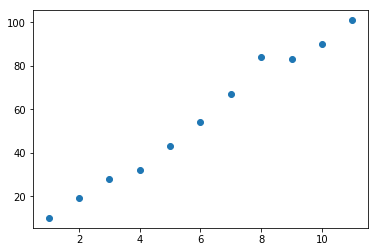

In [2]:
y = pd.DataFrame([10,19,28,32,43,54,67,84,83,90,101])
x = pd.DataFrame([1,2,3,4,5,6,7,8,9,10,11])

plt.scatter(x, y)
plt.show()

Coefficients: 
 [[9.38181818]]
Intercept: 
 [-0.74545455]


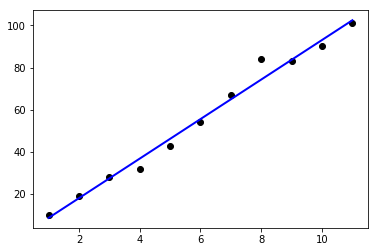

In [3]:
regr = linear_model.LinearRegression()

regr.fit(x,y)

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

plt.scatter(x,y,color='black')
plt.plot(x,regr.predict(x),color='blue',linewidth=2)
plt.show()

In [4]:
crime = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv',header=None)
crime.columns = ['city','population','violent_crime','murder_manslaughter','rape1','rape2','robbery','agg_assault','property_crime','burglary','larceny','motor_theft','arson']


In [5]:
# data cleaning

crime.drop(crime.index[[0,1,2,3,4,353,354,355]],inplace=True)
crime = crime.drop(['rape1'],axis=1)
crime = crime.reset_index(drop=True)


In [6]:
crime['arson'] = crime['arson'].fillna(0)

crime['population'] = crime['population'].apply(lambda x: str(x).replace(',',''))
crime['population'].astype(int)

crime['murder_manslaughter'] = crime['murder_manslaughter'].apply(lambda x: str(x).replace(',',''))
crime['murder_manslaughter'].astype(int)

crime['robbery'] = crime['robbery'].apply(lambda x: str(x).replace(',',''))
crime['robbery'].astype(int)

crime['property_crime'] = crime['property_crime'].apply(lambda x: str(x).replace(',',''))
crime['property_crime'].astype(int)

crime['populationsq'] = crime['population'].apply(lambda x: int(x)**2)

crime['catMurder'] = np.where(crime['murder_manslaughter'].astype(int) > 0,1,0)
crime['catRobbery'] = np.where(crime['robbery'].astype(int) > 0,1,0)
crime.head()

,city,population,violent_crime,murder_manslaughter,rape2,robbery,agg_assault,property_crime,burglary,larceny,motor_theft,arson,populationsq,catMurder,catRobbery
0,Adams Village,1861,0,0,0,0,0,12,2,10,0,0,3463321,0,0
1,Addison Town and Village,2577,3,0,0,0,3,24,3,20,1,0,6640929,0,0
2,Akron Village,2846,3,0,0,0,3,16,1,15,0,0,8099716,0,0
3,Albany,97956,791,8,30,227,526,4090,705,"3,243",142,0,9595377936,1,1
4,Albion Village,6388,23,0,3,4,16,223,53,165,5,0,40806544,0,1


In [7]:
cols = ['population','property_crime','robbery']
crime[cols] = crime[cols].apply(pd.to_numeric, errors='coerce', axis=1)